# Diagnostico de Tabla

In [19]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns

In [20]:
# read in all our data
# Tab-separated values
df = pd.read_csv('Productos.txt', sep='\t')
df.info() 
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   IdProducto       606 non-null    int64 
 1   Producto         606 non-null    object
 2   Color            352 non-null    object
 3   Precio Catálogo  395 non-null    object
 4   Tamaño           299 non-null    object
 5   Rango Tamaño     299 non-null    object
 6   Línea            380 non-null    object
 7   Modelo           397 non-null    object
 8   Subcategoría     397 non-null    object
 9   Categoría        397 non-null    object
dtypes: int64(1), object(9)
memory usage: 47.5+ KB


In [21]:
df

,IdProducto,Producto,Color,Precio Catálogo,Tamaño,Rango Tamaño,Línea,Modelo,Subcategoría,Categoría
0,562,"Turismo-1000 Amarillo, 50",Amarillo,"2384,07",50,48-52 CM,T,Turismo-1000,Turismo Bicicletas,Bicicletas
1,564,"Turismo-1000 Amarillo, 60",Amarillo,"2384,07",60,60-62 CM,T,Turismo-1000,Turismo Bicicletas,Bicicletas
2,600,"Montaña-500 Negro, 52",Negro,"539,99",52,48-52 CM,M,Montaña-500,Montaña Bicicletas,Bicicletas
3,588,"Montaña-400-W Plateado, 40",Plateado,"769,49",40,38-40 CM,M,Montaña-400-W,Montaña Bicicletas,Bicicletas
4,185,HL Ruta Llanta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
601,376,"Ruta-250 Negro, 48",Negro,"2443,35",48,48-52 CM,R,Ruta-250,Ruta Bicicletas,Bicicletas
602,280,"LL Ruta Marco - Negro, 44",Negro,"306,5636",44,42-46 CM,R,LL Ruta Marco,Ruta Marco,Componentes
603,2,Bola de rodamiento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,258,"LL Ruta Marco - Negro, 60",Negro,"337,22",60,60-62 CM,R,LL Ruta Marco,Ruta Marco,Componentes


## Observaciones

### Tabla

Se trata de un archivo con:
* 606 filas y 9 Columnas.
* Solo dos columnas están completas. Hay 7 que no.

1. Id Producto.

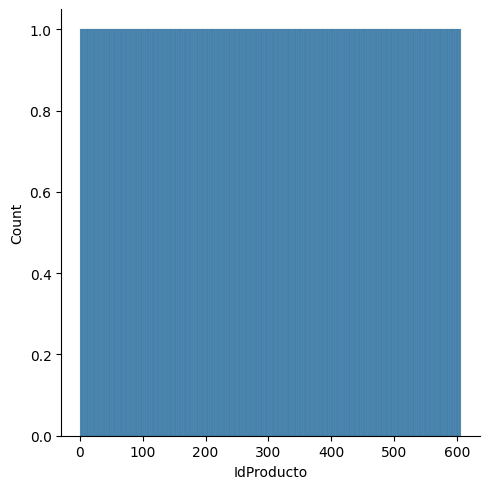

In [22]:
# see distribution
sns.displot(df, x='IdProducto', bins=len(df))

La primera columna parece estar en buenas condiciones para ser el indice que identifica cada producto.
Chequeo entonces que no contenga valores repetidos.

In [23]:
# check the lenght
len(df.IdProducto)

606

In [24]:
df.IdProducto.unique()

array([562, 564, 600, 588, 185,  81,  86,   8,  91, 181,  96,   3,  20,
       101, 141, 106, 329, 386, 314, 465, 397, 401, 243, 437, 247, 282,
       242, 220, 237, 228, 305, 426, 477, 498, 536, 537, 476, 471, 539,
       146, 315, 580,  39, 111, 433, 474, 338, 253, 151, 240, 520, 525,
       333, 310,  44, 292, 116, 410, 411, 431, 429, 156, 603, 260,  49,
       121, 324,  23, 374, 377, 161, 448, 396, 466,  54, 589, 126,  28,
       544, 166,  78, 200, 581, 473, 502,  59, 131, 244, 239, 327, 221,
       486, 591, 584,  64, 568, 136, 224, 495,  12,  10, 367,  69, 215,
       322, 195, 231, 463, 435, 293, 523, 343, 212, 456,  74, 538, 418,
       395, 173, 177, 561, 202, 592, 412,  18, 222, 182,  37, 440, 207,
       586, 582,  83, 365, 453, 519, 450, 475, 380, 384, 445,  88, 455,
       358,  93, 294, 439, 458, 233, 196,  98, 382, 404, 572,   6, 276,
         5,  14, 103, 593, 574, 143, 348, 279, 442, 198, 108, 216, 148,
       543, 287, 291,  21, 213,  41, 113, 390, 236, 153, 518, 34

In [25]:
df.IdProducto.value_counts()

IdProducto
562    1
423    1
268    1
304    1
97     1
      ..
556    1
168    1
595    1
227    1
209    1
Name: count, Length: 606, dtype: int64

In [26]:
# check if there is duplicated
df.IdProducto.duplicated().any()

False

In [27]:
# no duplicates -> column can be used as an index
df.set_index(df.columns[0], inplace=True)

In [28]:
# re-check for duplicate index values
df.index.duplicated().any()

False

In [29]:
# check the correct lengh of the index (must be = to df shape rows)
len(df.index)

606

La primera columna es el indice y está OK